WNIXALO | fastai `download_images` bug | 20181026
-|-|-

---

version: fastai developer install, updated: 20181026:02:26 EST

In [1]:
from fastai import *
from fastai.vision import *

this will create the folder structure, and initialize paths

In [2]:
folder = 'f22'
file   = 'urls_f22.txt'
path   = Path('data/aircraft/')
dest   = path/folder
dest.mkdir(parents=True, exist_ok=True)

image urls to use

In [3]:
urls = ['https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy',
        'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/f-22_2.jpg.pc-adaptive.full.medium.jpeg',
        'https://upload.wikimedia.org/wikipedia/commons/4/46/Lockheed_Martin_F-22A_Raptor_JSOH.jpg',
        'https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/f22raptorthatcouldtotallybeatupanf35.jpg?itok=JNOaTwUt',
        'https://www.lockheedmartin.com/content/dam/lockheed-martin/aero/photo/f22/F-22-Squadron.png',
        'https://amp.businessinsider.com/images/5b5f59472ee9d31d008b4928-750-500.jpg',
        'https://hips.hearstapps.com/pop.h-cdn.co/assets/17/32/1600x800/landscape-1502315162-badass-plane-f-22.jpg?resize=480:*',
        'http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85',
        'https://media.defense.gov/2011/Aug/11/2000229721/780/780/0/110811-F-BS330-001.JPG',
        'https://theaviationist.com/wp-content/uploads/2015/09/F-22-Code-One-2.jpg']

create the urls file to read from:

In [4]:
with open(path/'urls_f22.txt', 'w') as f:
    for url in urls:
        f.write(url + '\n')

On a macOS 10.14 machine, this **will** fail: either silently & instantly or by throwing a `BrokenProcessPool` error.

In [5]:
download_images(path/file, dest, max_pics=10)

You can check that the `dest` folder is still empty. If it didn't throw an error, you can just rerun it a few dozen times until it does.

In [23]:
download_images(path/file, dest, max_pics=10)

BrokenProcessPool: A child process terminated abruptly, the process pool is not usable anymore

[`download_images`](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L369) calls `download_image` via `ProcessPoolExecutor`. [`download_image`](https://github.com/fastai/fastai/blob/master/fastai/vision/data.py#L365) in turn, calls [`download_url`](https://github.com/fastai/fastai/blob/master/fastai/core.py#L156).

You can get `download_images` working again by calling `download_url` once manually. 

I discovered this by passing a folder pathlib path to it, causing an (soft) error (it wants a filepath to save as; passing it a `pathlib` `Path` instead of a `str` doesn't matter in this case), and discovered `download_images` started working afterwards.

It doesn't matter of `download_url` throws an error: `download_images` will begin working after the following line:

In [24]:
# I originally pulled code straight out of fastai/core.py to see what would happen
url = urls[0]
try: r = download_url(url, dest, overwrite=True, show_progress=False)
except Exception as e: print(f"Error {url} {e}")

Error https://nationalinterest.org/sites/default/files/styles/desktop__1486_x_614/public/main_images/fdgtrtttr.jpg?itok=wfGN1Ajy [Errno 21] Is a directory: 'data/aircraft/f22'


In [25]:
# voila
download_images(path/file, dest, max_pics=10)

Error http://imagesvc.timeincapp.com/v3/foundry/image/?q=70&w=1440&url=https%3A%2F%2Ftimedotcom.files.wordpress.com%2F2017%2F12%2Ff-22.jpg%3Fquality%3D85 'content-length'


In [26]:
list((path/folder).iterdir())

[PosixPath('data/aircraft/f22/00000004.jpg'),
 PosixPath('data/aircraft/f22/00000005.jpg'),
 PosixPath('data/aircraft/f22/00000006.jpg'),
 PosixPath('data/aircraft/f22/00000002.jpg'),
 PosixPath('data/aircraft/f22/00000003.jpg'),
 PosixPath('data/aircraft/f22/00000001.jpg'),
 PosixPath('data/aircraft/f22/00000000.jpg'),
 PosixPath('data/aircraft/f22/00000008.jpg'),
 PosixPath('data/aircraft/f22/00000009.jpg')]

In [34]:
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4)

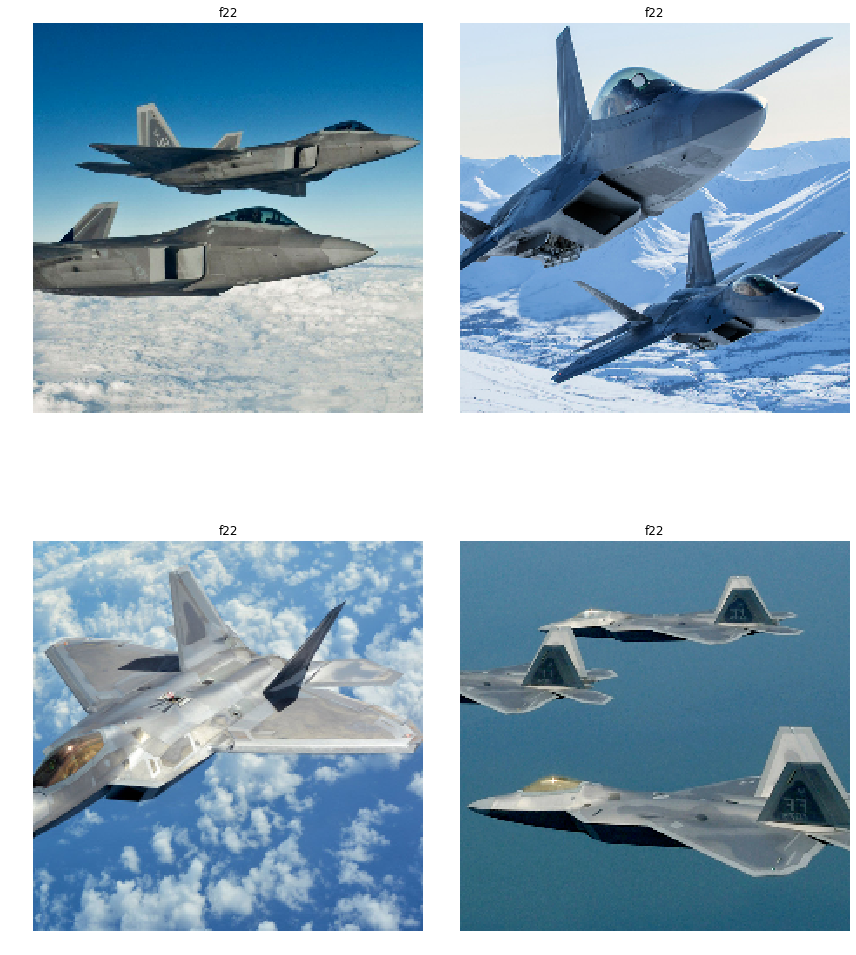

In [76]:
data.show_batch()